# Software profesional en Acústica 2024-25 (M2i)

*This notebook contains some code samples and text translated into Spanish from the notebooks [IA-maths-Jupyter](https://github.com/garth-wells/IA-maths-Jupyter), used in the course **Mathematical Models** in the University of Cambridge, and created by Garth N. Wells. All text is made available under the [Creative Commons Attribution-ShareAlike 4.0 International Public License](https://creativecommons.org/licenses/by-sa/4.0/legalcode). The code is released under the [MIT license](https://opensource.org/licenses/MIT).*

# Introducción

La representación gráfica es una de las herramientas más poderosas para explorar resultados numéricos y hoy en día una de las tareas más importantes en el análisis de resultados numéricos. De hecho, los gráficos se utilizan tanto para mostrar y comprender datos como para verificar visualmente los resultados calculados.

El módulo de Python más utilizado para la representación gráfica es **Matplotlib** (<http://matplotlib.org/>), que será el principal que utilizaremos en este curso. Este módulo es muy potente y tiene muchas funcionalidades. Este cuaderno Jupyter intenta presentar algunos de los elementos más básicos. Para tener una idea de todas las posibilidades que ofrece este módulo, puedes visitar la *Galería Matplotlib* (http://matplotlib.org/gallery.html).

El módulo **Matplotlib** dispone de multitud de herramientas para trabajar con funciones de una o más variables y, más precisamente, para representar los gráficos asociados sobre un conjunto dado de valores. En este cuaderno de Jupyter, revisaremos cómo representar funciones escalares de una, dos y tres variables utilizando superficies, líneas de contorno (también llamadas contornos), superficies o isosuperficies (en el caso tridimensional).

## Objetivos

- Uso de Matplotlib en el plano y el espacio tridimensional
- Representación gráfica vectorial
- Representación de funciones de una variable
- Representación de funciones escalares de varias variables

# Usando Matplotlib

Para utilizar **Matplotlib**, necesitamos importar su módulo. Dado que utilizaremos la interfaz `pyplot`, también será necesario importar `pyplot`:

In [6]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

'3.3.2'

Evidetemente para realizar cálculos numéricos de forma eficiente, también será necesario importar el módulo **Numpy**:

In [7]:
import numpy as np

Matplotlib es una biblioteca de Python que se puede utilizar fuera de los cuadernos Jupyter para representar gráficamente funciones y entidades geométricas (ya sea en pantalla o guardadas en un archivo). Para que las representaciones gráficas aparezcan incrustadas en este documento, utilizaremos el comando *magic*.
`%matplotlib en línea`. Por otro lado, si es necesario interactuar con los gráficos, también se puede utilizar la opción `%matplotlib notebook`.

In [8]:
%matplotlib inline

Para aumentar el tamaño de fuente que aparece en los ejes o en el texto de los gráficos, puede aumentar el tamaño de fuente predeterminado utilizando:
``pitón
matplotlib.rcParams.update({'font. Size': 16})
```

# Representación gráfica de vectores en $\mathbb{R}^2$ y $\mathbb{R}^3$

A continuación, primero representaremos gráficamente tres vectores en $\mathbb{R}^2$, cada uno con un color diferente, y guardaremos el resultado de esta visualización en un archivo con extensión `.pdf`:

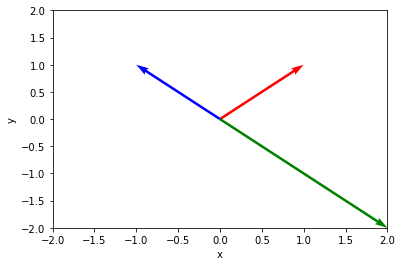

In [ ]:
# Matriz con los datos de los vectores
V = np.array([[1,1],[-1,1],[2,-2]])

# Representación gráfica de vectores 2D
plt.quiver([0, 0 ,0 ], [0, 0, 0], V[:,0], V[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)

# Definición de los limites de los ejes
plt.xlim([-2,2])
plt.ylim([-2,2])

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Escritura a fichero y visualización
plt.savefig("results/grafica-con-vectores.pdf")
plt.show()

La representación gráfica de elementos tridimensionales debe realizarse utilizando un módulo diferente de **Matplotlib**, que es **Axes3D**. De esta manera volveríamos a utilizar la función `quiver`:

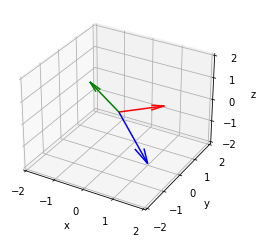

In [ ]:
desde mpl_toolkits.mplot3d importar Axes3D

# Datos vectoriales
V = np.array([[1,1,0],[-1,0,1],[1,0,-2]])

# Inicializando la representación 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Representación de vectores
ax.quiver([0], [0], [0], V[:,0], V[:,1], V[:,2], color=['r','g','b','r','r','g','g','b','b'])

# Ajuste de los límites del eje
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

# Etiquetas de eje
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Utilizando las funciones `np.dot` y `np.cross`, puedes calcular el producto escalar y el producto vectorial de dos vectores.

### Ejercicio
Dados los vectores $\vec{u}=(1,0,1)^t$ y $\vec{v}=(-1,2,0)^t$. Calcular y representar gráficamente el vector que resulta de proyectar $\vec{u}$ sobre $\vec{v}$.

In [ ]:
## TU CÓDIGO AQUÍ

### Ejercicio
Dados los vectores anteriores, calcule y represente gráficamente el vector $\vec{u}\times\vec{v}$.

In [ ]:
## TU CÓDIGO AQUÍ

### Ejercicio
Dados los vectores anteriores y el vector $\vec{w}=(0,1,1)^t$, calcula el valor del producto mixto y representa gráficamente los vértices del paralelepípedo cuyo volumen se está calculando.

In [ ]:
## TU CÓDIGO AQUÍ

# Representación gráfica de funciones con Matplotlib

Como ya hicimos en el apartado anterior, para utilizar los módulos **Numpy** y **Matplotlib** lo primero que debemos hacer es importarlos, y como utilizaremos este módulo mediante la interfaz `pyplot` de **Matplotlib**, también tendremos que importar éste.

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Gráficas de funciones de una variable

Los gráficos de funciones de una variable se crean evaluando el valor de la función en una gran cantidad de puntos almacenados en un vector **Numpy**. Utilizando un número suficiente de puntos, la gráfica de la función aparecerá suave. Sin embargo, debe entenderse que lo que se está representando gráficamente es una concatenación de segmentos rectos que unen los puntos que se han evaluado. Por ejemplo, para representar las funciones:
$$
f(x) = \sin(x),\qquad g(x)=\cos(x),\qquad x\in[0,4\pi].
$$
El primer paso será crear un vector de valores sobre el cual evaluar la función. Para ello, utilice la función `np.linspace` de la siguiente manera:

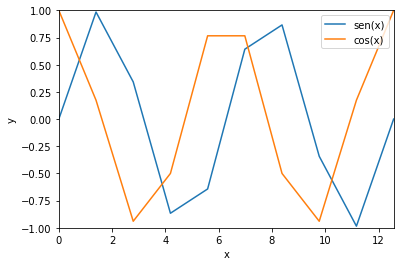

In [ ]:
# Creando los puntos donde se evalúa la función
x = np.linspace(0, 4*np.pi, 10)

# Gráfico de sin(x) y cos(x), con una etiqueta para cada uno
plt.plot(x, np.sin(x), tag='sin(x)')
plt.plot(x, np.cos(x), tag='cos(x)')

# Etiquetas de eje
plt.xlabel('x')
plt.ylabel('y')

# Agregar la leyenda (mostrando las etiquetas de la trama)
plt.legend()

# Define los límites de los ejes x e y
plt.xlim(x[0], x[-1])
plt.ylim([-1.,1.])

plt.show()

### Ejercicio
Define tres funciones de una variable y graficalas en el intervalo $[1,2]$ usando diferentes colores y estilos de línea. Para ello, consulte la ayuda de la función `plt.plot`.

In [ ]:
## TU CÓDIGO AQUÍ

## Representación de funciones escalares de varias variables

Consideremos la función de dos variables:
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right),\qquad (x,y)\in[-\pi,\pi]\times[-\pi,\pi].
$$
No es fácil visualizar la forma de esta función. Una forma de obtener una imagen del comportamiento de la función es crear una representación con un mapa de colores o líneas de contorno. Para hacer esto, debemos crear una nube de puntos en los ejes $x$ e $y$, y luego evaluar la función en esos puntos. Los puntos creados en este proceso de evaluación serán los que finalmente se utilizarán para visualizar la función.

In [ ]:
N = 50  # 50 puntos en cada dirección de los ejes cartesianos
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

El siguiente paso es crear una cuadrícula (o nube) de puntos $(x, y)$, para luego evaluar la función:

In [18]:
X, Y = np.meshgrid(x, y)
f = np.sin(X)*np.cos((X*Y**2)/10)

La primera posibilidad para representar la función es utilizando un mapa de colores utilizando la función **Matplotlib** `plt.contourf`:

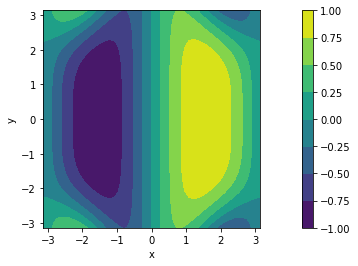

In [ ]:
plt.contourf(X, Y, f)
plt.colorbar() # Agrega la barra de color con los valores asociados
# Etiquetas de eje
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

Para crear una representación gráfica con las líneas de contorno, se utilizaría `plt.contour`:

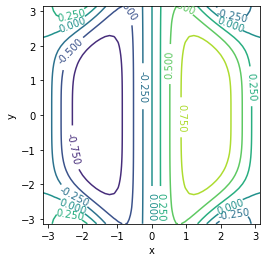

In [ ]:
p = plt.contour(X, Y, f)
plt.clabel(p) # Agrega el valor numérico a cada línea de contorno
# Etiquetas de eje
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

La función `plt.contour` admite el argumento opcional `level` con el que puedes indicar el número de líneas de contorno a representar o establecer los valores de las curvas a representar.

Otra forma de representar funciones de dos variables es utilizar un gráfico tridimensional con ejes $x$, $y$ y $z=f(x,y)$. Para crear un gráfico tridimensional en **Matplotlib**, es necesario incluir módulos adicionales específicos del espacio 3D:

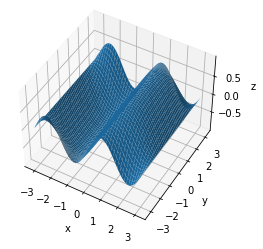

In [ ]:
from mpl_toolkits.mplot3d import axes3d
# Creación de la figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación de la superficie z=f(x,y)
surf = ax.plot_suface(X, Y, f)
# Etiquetas de eje
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Punto de vista del observador: elevación
ax.view_init(elev=45)
plt.show()

### Ejercicio
Definir una función de dos variables y representarla gráficamente en la región del plano $[1,2]\times[0,1]$ utilizando mapas de colores, líneas de contorno y superficies.

In [ ]:
## TU CÓDIGO AQUÍ